Oberservations:
1. The cities with the highest temperatures are closest to the equator.
2. The cities with the lowest percent humidity were around 20 degress latitude.
3. Levels of cloudiness raged across all latitudes.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json
import openweathermapy.core as owm
from citipy import citipy
from random import uniform

# Weather mapy Places API Key from config
from config import key

In [2]:
#collect 500+ cities across the world of varying distance from the equator
#Perform a weather check on each of the cities using a series of successive API calls.
#Include a print log of each city as it's being processed with the city number, city name, and requested URL.
#Get Temp Latitude, humidity,cloudiness, wind speed (mph) from api
#Create scatter plots

In [3]:
#create random list of lat and long
#use citipy to find the nearest city to lat and long
city = citipy.nearest_city(0.00, 0.00)
city
city.city_name

'takoradi'

In [10]:
lat=[]
long=[]
city_names=[]
city_counter = 0
temp = []
latitude =[]
humidity =[]
cloudiness = []
wind_speed = []


#creatins a random lat and lon
x, y = uniform(-180,180), uniform(-90, 90)
y

#collect 500+ cities across the world of varying distance from the equator
data_range = np.arange(1,10000,1)
data_range

# Create settings dictionary with information we're interested in
settings = {"units": "Imperial", "appid": key}



for data in data_range:
    
    
    #creating random list of lat
    x = uniform(-180,180)
    
    #creaing random list of long
    y = uniform(-90, 90)
    
    #finding nearest city to the random corrdinate
    city = citipy.nearest_city(x, y)
    
    #finding the city name from nearest city from above 
    city_name=city.city_name
    if city_name in city_names:
        #print("repeated")
        continue
    
    #counting the number of selected cities
    city_counter = city_counter + 1
    
    lat.append(x)
    long.append(y)
    city_names.append(city_name)
    
    
    
    try:
        current_weather = owm.get_current(city_name, **settings) 
    except:
        print("not city data")
        
    #print(current_weather)
    print(str(city_counter) +" " +str(city_name))
    #print(city_counter)
    
    #getting temp,latitute,humdity,cloudiness, wind spped
    temp.append(current_weather["main"]["temp"])
    humidity.append(current_weather["main"]["humidity"])
    cloudiness.append(current_weather["clouds"]["all"])
    wind_speed.append(current_weather["wind"]["speed"])
    latitude.append(current_weather["coord"]["lat"])
    
    #once city count gets to 500 then break the loop
    if city_counter == 500:
        break
    
                                            

1 cape town
2 longyearbyen
3 ushuaia
4 narsaq
5 jamalpur
6 berlevag
7 ilulissat
8 inhambane
9 zinder
10 san cristobal
not city data
11 taolanaro
12 lichtenburg
13 port elizabeth
14 mazara del vallo
not city data
15 malwan
16 pozo colorado
17 mar del plata
18 dikson
19 sosnytsya
20 busselton
21 qaanaaq
22 bathsheba
23 mahebourg
24 jamestown
not city data
25 barentsburg
26 nova borova
27 codrington
28 saint george
not city data
29 tubruq
30 la palma
not city data
31 illoqqortoormiut
32 ponta do sol
33 bredasdorp
34 chuy
35 hithadhoo
not city data
36 amderma
37 melilla
38 port alfred
39 hualmay
40 punta arenas
41 kruisfontein
42 georgetown
43 lebu
44 nadym
45 boca do acre
46 torbay
not city data
47 bargal
48 saldanha
49 puertollano
50 narimanov
51 bree
not city data
52 olafsvik
53 guadalajara
not city data
54 belushya guba
55 sorland
56 hamilton
57 arraial do cabo
58 victoria
59 adre
60 agadez
61 korampallam
62 marathon
63 clyde river
64 strezhevoy
65 albany
66 abnub
67 upernavik
68 herma

In [12]:
# create dataframe with data from all the cities
weather_dict = {
    "City Name":city_names,
    "Temperature": temp,
    "humidity": humidity,
    "latitude": latitude,
    "cloudiness":cloudiness,
    "wind speed":wind_speed
} 
weather_dict
weather_df = pd.DataFrame(weather_dict)
len(weather_df)

500

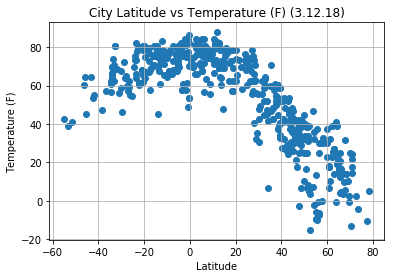

In [16]:
# Build a scatter plot for Temperature vs Latitude 
plt.scatter(weather_df["latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (F) (3.12.18)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Temperature (F) (3.12.18).png")

# Show plot
plt.show() 

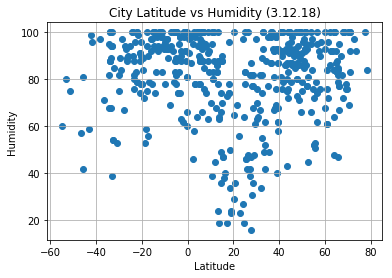

In [17]:
# Build a scatter plot for Humidity vs Latitude 
plt.scatter(weather_dict["latitude"], weather_dict["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (3.12.18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Humidity (3.12.18).png")

# Show plot
plt.show()

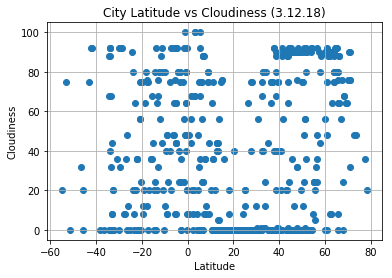

In [18]:
# Build a scatter plot for Cloudiness vs Latitude 
plt.scatter(weather_dict["latitude"], weather_dict["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (3.12.18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Cloudiness (3.12.18).png")

# Show plot
plt.show() 

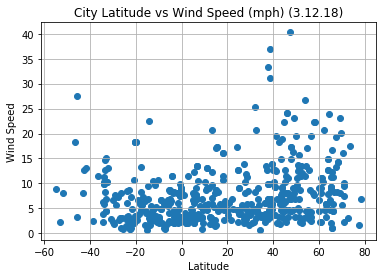

In [19]:
# Build a scatter plot for Cloudiness vs Latitude 
plt.scatter(weather_dict["latitude"], weather_dict["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (mph) (3.12.18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Wind Speed (mph) (3.12.18).png")

# Show plot
plt.show() 